<a href="https://colab.research.google.com/github/rahmashihab/Data-analysis-and-model-evaluation-using-random-forest-classifier/blob/main/Copy%20of%20Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [7]:
data=pd.read_csv("/content/drive/MyDrive/Exercise.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [10]:
data.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [11]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])

In [13]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [14]:
x=data.drop(["Purchased"],axis=1)

In [15]:
x

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000
...,...,...,...,...
395,15691863,0,46,41000
396,15706071,1,51,23000
397,15654296,0,50,20000
398,15755018,1,36,33000


In [16]:
y=data.Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

t

In [18]:
len(xtrain),len(ytrain)

(320, 320)

In [19]:
len(xtest),len(ytest)

(80, 80)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model1=LogisticRegression()

In [24]:
model1.fit(xtrain,ytrain)

LogisticRegression()

In [25]:
model1.score(xtest,ytest)

0.7375

In [29]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()

In [30]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [31]:
model2.score(xtest,ytest)

0.8875

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model3=RandomForestClassifier()

In [35]:
model3.fit(xtrain,ytrain)

RandomForestClassifier()

In [36]:
model3.score(xtest,ytest)

0.925

In [38]:
ypred=model3.predict(xtest)
ypred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [47]:
ytest

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [42]:
Cm=confusion_matrix(ypred,ytest)
Cm

array([[47,  1],
       [ 5, 27]])

<Axes: >

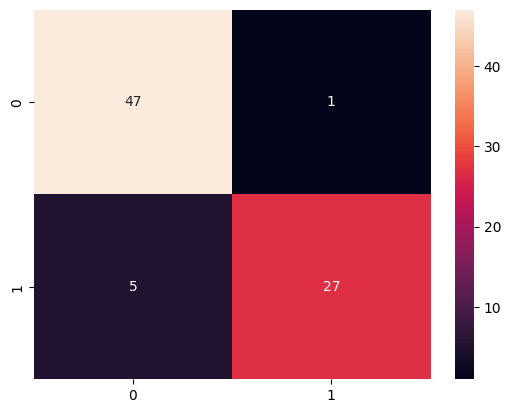

In [46]:
import seaborn as sns
sns.heatmap(Cm,annot=True)

In [49]:
model3.predict([[15654296,0,50,1 ]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])